# Actividad 02: Librerias y modelamiento básico
---
# Benjamin Escobar Jaramillo CC 1001228411

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



### ***Imports***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



ingrese la velocidad de la motocicleta 15
ingrese la aceleración del policia 3


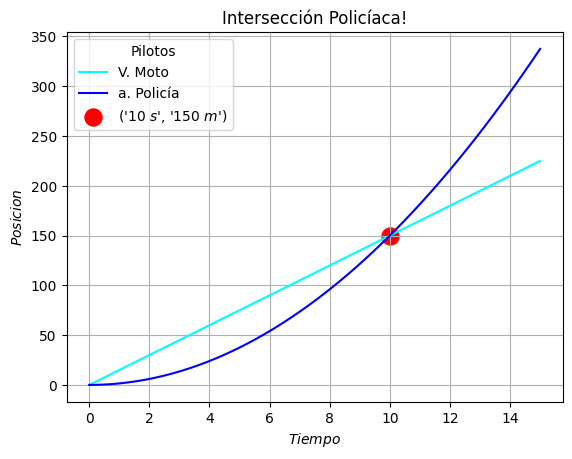

In [2]:
vm=float(input("ingrese la velocidad de la motocicleta ")) #un flota para tener números y no caracteres
ap=float(input("ingrese la aceleración del policia "))

# Hagamos una grafica de posición vs tiempo!
#Primero, necesitamos una muestra considerable de tiempo (nuestro eje x)
t=np.linspace(0,((2*vm)/ap)*1.5)   #EXPLICACIÓN!!
"Note que para una correcta visualización gráfica, para velocidades muy grandes requerimos tiempos muy grandes,"
"mientras que para velocidades muy pequeñas, necesitamos un eje de tiempo muy pequeño! como solucionamos? "
"Sencillo! con un linspace que dependa del los valores de las velocidades!!"
"La ecuación en el valor maxímo, es exactamente el tiempo de intersección, es decir, donde se encontrarán"
"y como queremos ver un poquito mas allá, a este valor le multiplicamos una cantidad moderada, por ejemplo, 1.5 veces"
"Asi que, adelante! ingrese valores ridiculos en proporción, y notará que la grafica siempre es visualmente consistente!"


yvm=vm*t                      #y ahora los consecuentes ejes y! (posición)
yap=(1/2)*ap*t**2

fig,ax=plt.subplots()            #hacemos esta notacion, para tener mas control de los axis individuales
ax.plot(t,yvm,color="cyan",label="V. Moto")
ax.plot(t,yap,color="b",label="a. Policía")
ax.grid()
ax.set(
    xlabel="$Tiempo$",                    #un par de titulos (mas bonito, no?)
    ylabel="$Posicion$",
    title="Intersección Policíaca!")



  #listo! ahora prosigue... calcular la intersección!

t_intersección=(2*vm)/ap          #Un poquito de despejes básicos...
x_intersección=vm*t_intersección   # y cualquiera de ambas ecuaciones hubiese servido (usemos la facil, no?)

ax.scatter(t_intersección,x_intersección,color="red",s=150,label=(f"{int(t_intersección)} $s$",f"{int(x_intersección)} $m$"))
ax.legend(title="Pilotos") #Y voilà!! con fines esteticos, aproximamos la intersección


##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




In [3]:
def LJ(r,e,sigma):
  return 4*e*((sigma/r)**12 - (sigma/r)**6) #Hacemos la funcion, con los parametros solicitados.

In [4]:
def graficaV(sigma):
  xsigma=np.linspace(((2.5)*sigma)-sigma*1.5,(2.5)*sigma,200) #El valor máximo es 2.5*sigma, y empieza en un rango razonable cercano al max
  ysigma=[]                                               #Esto con el objetivo que la gráfica siempre sea visualmente práctica
  for r in xsigma:
    ysigma.append(LJ(r,1,sigma))                 #Entramos en los valores del rango, y evaluamos para cada uno
  ysigma=np.array(ysigma)                        #por comodidad, trabajamos todo con arrays

  fig,ax=plt.subplots()                          #y ahora, solo resta graficar.
  plt.grid()
  ax.plot(xsigma,ysigma,linewidth=3)             #los x & y que tomamos...
  ax.set_ylabel("Potencial $V(r)$")
  ax.set_xlabel("Sigmas")
  plt.axhline(y=-1,c="r",linestyle="--")       #Esta linea es el punto de equilibrio (con el e=cte=1)
  plt.axvline(x=2**(1/6)*sigma,c="r",linestyle="--") #y... ah ha! esta linea DEMUESTRA que este punto de equilibrio siempre estará ubicado en 2**1/6 sigmas
  plt.axhline(y=0,c="green",linestyle="--")

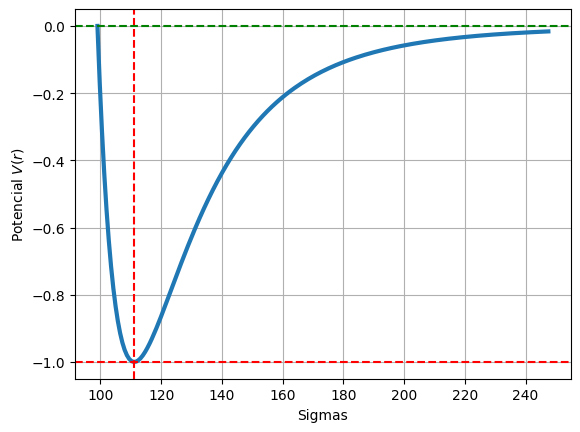

In [21]:
graficaV(99) #Aqui, cambie sigma a su preferencia, notará como la estabilidad rm Siempre estará en 2**1/6 sigmas

In [6]:
sigma=33        #Y ademas, cambie sigma a su preferencia, notará que se mantendrá estable en la distancia de equilibrio (con e=cte)
LJ((2**(1/6))*sigma,1,sigma)

-1.0

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [7]:
# Comencemos entonces con nuestras lecturas de archivos!
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
html_content = pd.read_html(url) #seguimos los pasos...
alturas = html_content[0]                        #y voilà, aquí tenemos nuestro dataframe! comencemos
alturas                       #Hagamos una pequeña observación primero, para tener un panorama...

,Unnamed: 0,Country,"Average Height, Boys, 19 yo (cm)↓",Girls 19 (cm),Boys 19 (in),Girls 19 (in)
0,NaN,Netherlands,184,170,6 ft.,5 ft. 7 in.
1,NaN,Montenegro,183,170,6 ft.,5 ft. 7 in.
2,NaN,Estonia,183,169,6 ft.,5 ft. 6 in.
3,NaN,Bosnia and Herzegovina,182,167,6 ft.,5 ft. 6 in.
4,NaN,Iceland,182,169,6 ft.,5 ft. 7 in.
...,...,...,...,...,...,...
191,NaN,Papua New Guinea,163,157,5 ft. 4 in.,5 ft. 2 in.
192,NaN,Solomon Islands,163,157,5 ft. 4 in.,5 ft. 2 in.
193,NaN,Laos,163,153,5 ft. 4 in.,5 ft.
194,NaN,Timor-Leste,160,153,5 ft. 3 in.,5 ft.


In [8]:
# Ademas de los cambios propuestos, observamos que la primera columna esta llena de datos inneecesarios (NaN...)
# Por lo cual, tambien los limpiaremos.

alturas= alturas.rename(columns={"Country": "Pais", "Average Height, Boys, 19 yo (cm)↓": "Altura Promedio, Niños 19 años (cm)↓",
                                 "Girls 19 (cm)": "Altura Promedio, Niñas 19 años (cm)"}) #Rename! (Muy autoexplicativo...)
alturas= alturas.drop(columns=["Boys 19 (in)","Girls 19 (in)"]) #Eliminamos las malas columnas
alturas                       #Veamos como va nuestro trabajo!

,Unnamed: 0,Pais,"Altura Promedio, Niños 19 años (cm)↓","Altura Promedio, Niñas 19 años (cm)"
0,NaN,Netherlands,184,170
1,NaN,Montenegro,183,170
2,NaN,Estonia,183,169
3,NaN,Bosnia and Herzegovina,182,167
4,NaN,Iceland,182,169
...,...,...,...,...
191,NaN,Papua New Guinea,163,157
192,NaN,Solomon Islands,163,157
193,NaN,Laos,163,153
194,NaN,Timor-Leste,160,153


In [9]:
from re import A
#Ahora requerimos una grafica con alturas especificas... huh? Sencillo; filtremos los datos!
"El plan es este! hagamos un nuevo dataset para los niños, con 21 datos! (top 10 mas altos, top 10 mas bajos, y colombia!)"
"Y equivalentemente para las chicas, luego simplemente graficamos los datos en un mismo plot!"

#A) Niños
aniños=alturas.drop(columns=["Altura Promedio, Niñas 19 años (cm)"]) #Ahora solo tengo las alturas de los niños... filtremos!!!
#Los datos parecen ya estar ordenados de mayor a menor, sin embargo, para garantizar esto... organicemoslos!
aniños=aniños.sort_values(by=["Altura Promedio, Niños 19 años (cm)↓"],ascending=False) #Ahora estan de mayor a menor!
#Listo, prosigue seleccionar las columnas del (0,9)=10 las mas grandes
#y (195,184)=11 las mas pequeñas (en el intervalo hay 11 datos, pues existe el dato 195=total, el cual no es un pais.)
#Y entre todo esto, tambien conservar a Colombia, por lo cual... eliminemos!!!

aniñosmax=aniños
for i in range(10,len(aniños)): #Seleccionamos todos los indices excepto los 10 primeros, y los eliminamos
  aniñosmax=aniñosmax.drop(i)    #Df de los 10 max!

aniñosmin=aniños
for i in range(0,len(aniños)-11): #ahora con los 10 ultimos
  aniñosmin=aniñosmin.drop(i)     #df de los 10 mins!
aniñosmin=aniñosmin.drop(195)   # y el mencionado retoque(esa fila no representaba un pais!)

colombia=aniños                # Y finalmente hacemos un dataframe para Colombia!
a=0
while a<len(aniños):
  for i in aniños["Pais"]:
    if i!="Colombia":
      colombia=colombia.drop(a)
      a+=1
    else:
      a+=1
#Eureka! Eureka! Ya tenemos un df de los 10 max, los 10 min, y de Colombia!!! Solo queda... Concatenar (pues hablamos de filas)!
niños=pd.concat([colombia,aniñosmax,aniñosmin])
niños #Voila! El maravilloso df de niños, con el top 10 max, el top 10 min, y Colombia

,Unnamed: 0,Pais,"Altura Promedio, Niños 19 años (cm)↓"
113,NaN,Colombia,172
0,NaN,Netherlands,184
1,NaN,Montenegro,183
2,NaN,Estonia,183
3,NaN,Bosnia and Herzegovina,182
4,NaN,Iceland,182
5,NaN,Denmark,182
6,NaN,Czech Republic,181
7,NaN,Latvia,181
8,NaN,Slovakia,181


In [10]:
#Una vez hecho esto... es una sencillez de maravilla, pues el de niñas, es totalmente analogo.

#B) Niñas
aniña=alturas.drop(columns=["Altura Promedio, Niños 19 años (cm)↓"])
aniña=aniña.sort_values(by=["Altura Promedio, Niñas 19 años (cm)"],ascending=False)

aniñamax=aniña
for i in range(10,len(aniña)):                 #Todo igual (nuevos nombres, logicamente)
  aniñamax=aniñamax.drop(i)

aniñamin=aniña
for i in range(0,len(aniña)-11):
  aniñamin=aniñamin.drop(i)
aniñamin=aniñamin.drop(195)

colombia2=aniña
a=0
while a<len(aniños):
  for i in aniños["Pais"]:
    if i!="Colombia":
      colombia2=colombia2.drop(a)
      a+=1
    else:
      a+=1

niña=pd.concat([colombia2,aniñamax,aniñamin])
niña #Finish!!! Hora de hacer... Una gráfica!!!

,Unnamed: 0,Pais,"Altura Promedio, Niñas 19 años (cm)"
113,NaN,Colombia,158
0,NaN,Netherlands,170
1,NaN,Montenegro,170
2,NaN,Estonia,169
4,NaN,Iceland,169
7,NaN,Latvia,169
5,NaN,Denmark,169
6,NaN,Czech Republic,168
3,NaN,Bosnia and Herzegovina,167
8,NaN,Slovakia,167


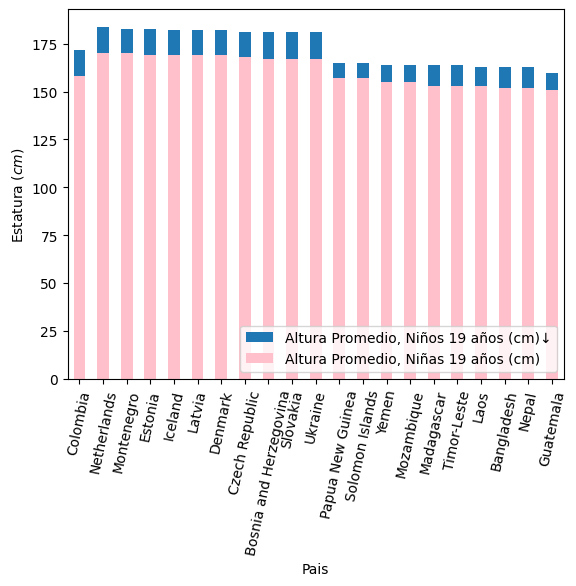

In [11]:
ax=niños.plot(x=niños.columns[1], y=niños.columns[2],kind="bar",ylabel="Estatura ($cm$)") #Hacemos la de niños
niña.plot(ax=ax,x=niña.columns[1], y=niña.columns[2],kind="bar",color="pink") #ax=ax los pone en la misma grafica...
plt.xticks(rotation=78) #un poco de estetica, huh?
ax.legend(loc='lower right') #Que no estorbe la leyenda!

#Y listo! Una grafica que compara ambos!!

In [12]:
#Acaso la altura tendrá que ver con el income...? Observemos!
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
html_content = pd.read_html(url)
income = html_content[0]              #Listo! aca tenmos el df del income
income=income.rename(columns={"Country":"Pais","Wealth per Adult 2022↓":"Riqueza por Adulto 2022↓",
"GDP per Adult 2022":"PIB por adulto 2022","Total Wealth 2022":"Patrimonio total 2022","Share of World Wealth 2022":
"Participación en la riqueza mundial 2022"})    #Para estar en el mismo contexto hispanoparlante,no?

total=pd.merge(alturas,income)    #Okay!! aqui tenemos el merge de alturas e income!
total

,Unnamed: 0,Pais,"Altura Promedio, Niños 19 años (cm)↓","Altura Promedio, Niñas 19 años (cm)",Riqueza por Adulto 2022↓,PIB por adulto 2022,Patrimonio total 2022,Participación en la riqueza mundial 2022
0,NaN,Netherlands,184,170,"$358,235","$73,996",$4.9T,1.1%
1,NaN,Montenegro,183,170,"$81,900","$12,830",$39B,NaN
2,NaN,Estonia,183,169,"$78,777","$37,294",$82B,NaN
3,NaN,Bosnia and Herzegovina,182,167,"$33,593","$9,702",$88B,NaN
4,NaN,Iceland,182,169,"$498,290","$102,597",$129B,NaN
...,...,...,...,...,...,...,...,...
188,NaN,Mozambique,164,155,"$1,353","$1,179",$21B,NaN
189,NaN,Papua New Guinea,163,157,"$8,606","$6,097",$45B,NaN
190,NaN,Solomon Islands,163,157,"$11,660","$4,557",$4B,NaN
191,NaN,Laos,163,153,"$6,191","$2,997",$28B,NaN


In [13]:
#Ahora bien, no es nuestro primer rodeo sacando los 10 mayores y 10 menores (alturas)!
#Asi que, de manera practica, ya tenemos dataframes con los 10max,min de niños, y niñas! Porque no usarlo?

niñoasmaxmin=pd.merge(niños,niña)         #Aqui tenemos el df de los niños y nñas maxmin en uno solo
completomaxmin=pd.merge(niñoasmaxmin,income) #Y por supuesto, al combinarlo con income, filtra por los paises que tienen en comun!
completomaxmin                               #Por lo cual, este df tiene exactamente los datos de niñosmaxmin, como tambien el PIB!·

,Unnamed: 0,Pais,"Altura Promedio, Niños 19 años (cm)↓","Altura Promedio, Niñas 19 años (cm)",Riqueza por Adulto 2022↓,PIB por adulto 2022,Patrimonio total 2022,Participación en la riqueza mundial 2022
0,NaN,Colombia,172,158,"$15,464","$8,230",$564B,0.1%
1,NaN,Netherlands,184,170,"$358,235","$73,996",$4.9T,1.1%
2,NaN,Montenegro,183,170,"$81,900","$12,830",$39B,NaN
3,NaN,Estonia,183,169,"$78,777","$37,294",$82B,NaN
4,NaN,Bosnia and Herzegovina,182,167,"$33,593","$9,702",$88B,NaN
5,NaN,Iceland,182,169,"$498,290","$102,597",$129B,NaN
6,NaN,Denmark,182,169,"$409,954","$87,815",$1.9T,0.4%
7,NaN,Czech Republic,181,168,"$90,393","$35,203",$770B,0.2%
8,NaN,Latvia,181,169,"$97,583","$29,751",$141B,NaN
9,NaN,Slovakia,181,167,"$62,125","$26,469",$270B,0.1%


In [14]:
#Ahora bien, en el df anterior, podra encontrar un problema; la columna del PIB (que pronto graficaremos) estan en modo $
#Es decir, no será detectado como un float normal! por lo cual, resolvamos el problema!!
completomaxmin["PIB por adulto 2022"]=completomaxmin["PIB por adulto 2022"].str.replace("$","") #perfecto!
completomaxmin["PIB por adulto 2022"] = pd.to_numeric(completomaxmin["PIB por adulto 2022"].str.replace(",", ""))#Ahora son numeros!
completomaxmin["PIB por adulto 2022"] = completomaxmin["PIB por adulto 2022"] // 1000 #Esto es una sutileza para las graficas!
#Verá, los numeros estan en miles! por lo cual las estaturas no se verían. al dividir cada numero, permite una mejor visualización


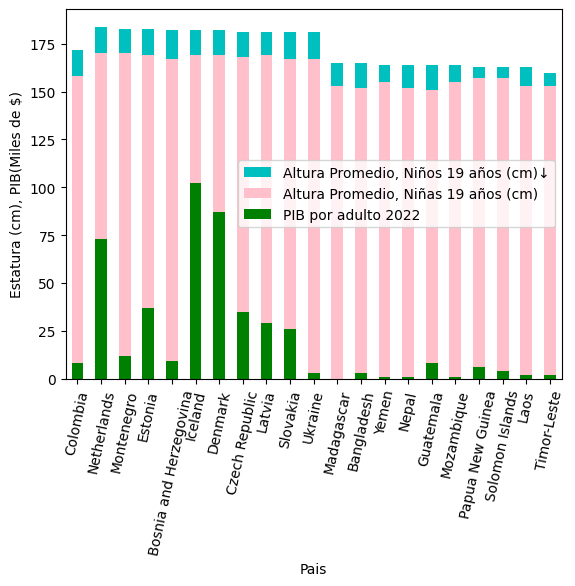

In [15]:
# A graficar!
ax=completomaxmin.plot(x=completomaxmin.columns[1], y=completomaxmin.columns[2],kind="bar",color="c",ylabel="Estatura (cm), PIB(Miles de $)") #Niños
completomaxmin.plot(ax=ax, x=completomaxmin.columns[1], y=completomaxmin.columns[3],kind="bar",color="Pink") #Niñas
completomaxmin.plot(ax=ax, x=completomaxmin.columns[1], y=completomaxmin.columns[5],kind="bar",color="green") #PIB

plt.xticks(rotation=78)
ax.legend(loc='center right') #Reorganizamos la localizacion de la leyenda

In [17]:
#Dada la informacion de los datos, parece indicar que no hay una relación directa perse, pues:
#islandia, no es el mayor de todos, aunque cuenta con el mayor PIB! sin embargo;
#Los top 10 max altura, tienen en su mayoría, mayor PIB que los top 10 min altura... que curioso, no?
#Concluyendo entonces, mas allá de la curiosidad, no hay una relación directa.